<a href="https://colab.research.google.com/github/dhruvkumar22/ML-BASICS/blob/master/cnn_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline
import os

TensorFlow 1.x selected.


In [2]:
tf.__version__

'1.15.2'

After Loading the libraries we need to import the data as well as include encoding i.e. One-Hot-Encoding


After importing all the modules, you will now learn how to load data in TensorFlow, which should be pretty straightforward. The only thing that you should take into account is the one_hot=True argument, which you'll also find in the line of code below: it converts the categorical class labels to binary vectors.

In one-hot encoding, you convert the categorical data into a vector of numbers. You do this because machine learning algorithms can't work with categorical data directly. Instead, you generate one boolean column for each category or class. Only one of these columns could take on the value 1 for each sample. That explains the term "one-hot encoding".

But what does such a one-hot encoded data column look like?

For your problem statement, the one-hot encoding will be a row vector, and for each image, it will have a dimension of 1 x 10. It's important to note here that the vector consists of all zeros except for the class that it represents. There, you'll find a 1. For example, the ankle boot image that you plotted above has a label of 9, so for all the ankle boot images, the one-hot encoding vector would be [0 0 0 0 0 0 0 0 0 1].

Now that all of this is clear, it's time to import the data!

In [3]:
data = input_data.read_data_sets('data/fashion',one_hot=True,\
                                 source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 26421880 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 29515 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 4422102 bytes.
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 5148 bytes.
Extracting data/fashion/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/data

# Analyzing the data

In [4]:
print("Training set (images) shape: {shape}".format(shape=data.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=data.train.labels.shape))


print("Test set (images) shape: {shape}".format(shape=data.test.images.shape))
print("Test set (labels) shape: {shape}".format(shape=data.test.labels.shape))


Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


From the above output, you can see that the training data has a shape of 55000 x 784: there are 55,000 training samples each of the 784-dimensional vector. Similarly, the test data has a shape of 10000 x 784, since there are 10,000 testing samples.

The 784-dimensional vector is nothing but a 28 x 28-dimensional matrix. That's why you will be reshaping each training and testing sample from a 784-dimensional vector to a 28 x 28 x 1-dimensional matrix in order to feed the samples into the CNN model.

For simplicity, let's create a dictionary that will have class names with their corresponding categorical class labels.

In [5]:
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

Text(0.5, 1.0, '(Label: Ankle boot)')

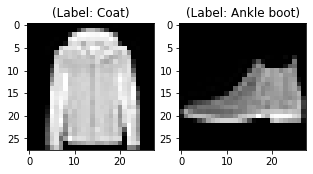

In [6]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)         #defines the position of the subplot
curr_img = np.reshape(data.train.images[0], (28,28))    # converts an image into a 28*28 matrix
curr_lbl = np.argmax(data.train.labels[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(data.test.images[0], (28,28))
curr_lbl = np.argmax(data.test.labels[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

# Data Preprocessing

In [7]:
data.train.images[0][:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00392157,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.17254902,
       0.49803925, 0.7137255 , 0.7254902 , 0.6313726 , 0.47058827,
       0.21568629, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.16470589, 0.77647066, 0.9843138 , 1.        , 0.9843138 ,
       0.97647065, 0.9686275 , 1.        , 0.98823535, 0.83921

In [8]:
data.train.images[0][500:]

array([0.40784317, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03921569, 0.9568628 ,
       0.8588236 , 0.9803922 , 0.80392164, 0.7803922 , 0.8196079 ,
       0.79215693, 0.8196079 , 0.82745105, 0.7411765 , 0.83921576,
       0.8078432 , 0.8235295 , 0.7843138 , 0.8313726 , 0.6039216 ,
       0.94117653, 0.81568635, 0.8588236 , 0.54901963, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.08235294, 1.        , 0.8705883 , 0.9333334 ,
       0.72156864, 0.8235295 , 0.75294125, 0.8078432 , 0.8196079 ,
       0.8235295 , 0.7411765 , 0.8352942 , 0.82745105, 0.8196079 ,
       0.75294125, 0.8941177 , 0.60784316, 0.8862746 , 0.9333334 ,
       0.9450981 , 0.6509804 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.14509805,
       0.9607844 , 0.8862746 , 0.9450981 , 0.5882353 , 0.7725491 ,
       0.7411765 , 0.8000001 , 0.8196079 , 0.8235295 , 0.71764

In [9]:
np.max(data.train.images[0])

1.0

In [10]:
np.min(data.train.images[0])

0.0

Let us reshape the images so that it's of size 28 x 28 x 1, and feed this as an input to the network.

The reason you need to reshape your data is that Tensorflow expects a certain input shape for its Deep Learning Model, i.e., in this case, a Convolution Neural Network, specifically:

(`<number of images>, <image x_dim>, <image y_dim>, <number of channels>`)

The dataset class used here apparently yields a flattened (list-like) shape for these images, so the reshape command puts the data structure into a type that the TF class can work with.

In [11]:
train_X = data.train.images.reshape(-1, 28, 28, 1)
test_X = data.test.images.reshape(-1,28,28,1)                 # -1 because we don,t know the values  the last value refers to the channels i.e 1 for black and white images 3 if rgb

In [12]:
train_y = data.train.labels
test_y = data.test.labels

In [13]:
train_X.shape, test_X.shape

((55000, 28, 28, 1), (10000, 28, 28, 1))

In [14]:
train_y.shape, test_y.shape

((55000, 10), (10000, 10))

# The Deep Neural Network

You'll use three convolutional layers:

The first layer will have 32-3 x 3 filters,
The second layer will have 64-3 x 3 filters and
The third layer will have 128-3 x 3 filters.
In addition, there are three max-pooling layers, each of the size 2 x 2.


![alt text](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1591576676/Screen_Shot_2020-06-07_at_8.37.21_PM_kytyha.png)


You start with defining the training iterations training_iters, the learning rate learning_rate, and the batch size batch_size. Keep in mind that all these are hyperparameters and that these don't have fixed values, as these differ for every problem statement.

Nevertheless, here's what you usually can expect:

* Training iterations indicate the number of times you train your network,
* It is a good practice to use a learning rate of 1e-3, the learning rate is a factor that is multiplied with the weights based on which the weights get updated, and this indeed helps in reducing the cost/ loss/ cross-entropy and ultimately in converging or reaching the local optima. The learning rate should neither be too high or too low it should be a balanced rate.
* The batch size means that your training images will be divided into a fixed batch size, and at every batch, it will take a fixed number of images and train them. It's recommended to use a batch size in the power of 2. Since the number of the physical processor is often a power of 2, using several virtual processors different from a power of 2 leads to poor performance. Also, taking a very large batch size can lead to memory errors, so you have to make sure that the machine you run your code on has sufficient RAM to handle specified batch size.!

In [15]:
training_iters = 10
learning_rate = 0.001
batch_size = 128

# Network parameters

Next, you need to define the network parameters. Firstly, you define the number of inputs. This is 784 since the image is initially loaded as a 784-dimensional vector. Later, you will see that how you will reshape the 784-dimensional vector to a 28 x 28 x 1 matrix. Secondly, you'll also define the number of classes, which is nothing else than the number of class labels.

In [16]:
# MNIST data input (img shape: 28*28)
n_input = 28

# MNIST total classes (0-9 digits)
n_classes = 10

Now is the time to use those placeholders, about which you read previously in this tutorial. You will define an input placeholder x, which will have a dimension of None x 784 and the output placeholder with a dimension of None x 10. To reiterate, placeholders allow you to do operations and build your computation graph without feeding in data.

Similarly, y will hold the label of the training images in the form matrix, which will be a None*10 matrix.

The row dimension is None. That's because you have defined batch_size, which tells placeholders that they will receive this dimension when you feed in the data to them. Since you set the batch size to 128, this will be the row dimension of the placeholders.

In [17]:
#both placeholders are of type float
x = tf.placeholder("float", [None, 28,28,1])
y = tf.placeholder("float", [None, n_classes])

## Creating wrappers for simplicity
In your network architecture model, you will have multiple convolution and max-pooling layers. In such cases, it's always a better idea to define convolution and max-pooling functions, so that you can call them as many times you want to use them in your network.

In the conv2d() function, you pass 4 arguments: input x, weights W, bias b, and strides. This last argument is by default set to 1, but you can always play with it to see how the network performs. The first and last stride must always be 1 because the first is for the image-number, and the last is for the input-channel (since the image is a gray-scale image which has only one channel). After applying the convolution, you will add bias and apply an activation function called Rectified Linear Unit (ReLU).
The max-pooling function is simple: it has the input x and a kernel size k, which is set to be 2. This means that the max-pooling filter will be a square matrix with dimensions 2 x 2, and the stride by which the filter will move in is also 2.
You will be padding equal to the same which ensures that while performing the convolution operations, the boundary pixels of the image are not left out, so padding equal to same will basically add zeros at the boundaries of the input and allow the convolution filter to access the boundary pixels as well.

Similarly, max-pooling operation padding equal to the same will add zeros. Later, when you define the weights and the biases, you will notice that input of size 28 x 28 is downsampled to 4 x 4 after applying three max-pooling layers.

In [18]:
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):    # k stands for kernel
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')


After you have defined the conv2d and maxpool2d wrappers, now you can define your weights and biases variables. So, let's get started!

But first, let's understand each weight and bias parameter step by step. You will create two dictionaries, one for weight and the second for the bias parameter.

If you can recall from the above figure that the first convolution layer has 32-3x3 filters, so the first key (wc1) in the weight dictionary has an argument shape that takes a tuple with 4 values: the first and second are the filter size, while the third is the number of channels in the input image and the last represents the number of convolution filters you want in the first convolution layer. The first key in the biases dictionary, bc1, will have 32 bias parameters.
Similarly, the second key (wc2) of the weight dictionary has a shape parameter that will take a tuple with 4 values: the first and second again refer to the filter size, and the third represents the number of channels from the previous output. Since you pass 32 convolution filters on the input image, you will have 32 channels as an output from the first convolution layer operation. The last represents the number of filters you want in the second convolution filter. Note that the second key in the biases dictionary, bc2, will have 64 parameters.
You will do the same for the third convolution layer.

Now, it's important to understand the fourth key (wd1). After applying 3 convolution and max-pooling operations, you are downsampling the input image from 28 x 28 x 1 to 4 x 4 x 1, and now you need to flatten this downsampled output to feed this as input to the fully connected layer. That's why you do the multiplication operation 44128, which is the output of the previous layer or number of channels that are outputted by the convolution layer 3. The second element of the tuple that you pass to shape has number of neurons that you want in the fully connected layer. Similarly, in the biases dictionary, the fourth key bd1 has 128 parameters.



You will follow the same logic for the last fully connected layer, in which the number of neurons will be equivalent to the number of classes.

In [19]:
weights = {
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()),
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()),
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()),
    'wd1': tf.get_variable('W3', shape=(4*4*128,128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('W6', shape=(128,n_classes), initializer=tf.contrib.layers.xavier_initializer()),
}
biases = {
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'bd1': tf.get_variable('B3', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('B4', shape=(10), initializer=tf.contrib.layers.xavier_initializer()),
}

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Now, it's time to define the network architecture! Unfortunately, this is not as simple as you do it in the Keras framework!

The conv_net() function takes 3 arguments as an input: the input x and the weights and biases dictionaries. Again, let's go through the construction of the network step by step:

Firstly, you reshape the 784-dimensional input vector to a 28 x 28 x 1 matrix. As you had seen earlier, the images are loaded as a 784-dimensional vector, but you will feed the input to your model as a matrix of size 28 x 28 x 1. The -1 in the reshape() function means that it will infer the first dimension on its own, but the rest of the dimensions are fixed, that is, 28 x 28 x 1.
Next, as shown in the figure of the architecture of the model, you will define conv1, which takes input as an image, weights wc1, and biases bc1. Next, you apply max-pooling on the output of conv1, and you will perform a process analogous to this until conv3.
Since your task is to classify, given an image, it belongs to which class label. So, after you pass through all the convolution and max-pooling layers, you will flatten the output of conv3. Next, you'll connect the flattened conv3 neurons with each and every neuron in the next layer. Then you will apply activation function on the output of the fully connected layer fc1.
Finally, in the last layer, you will have 10 neurons since you have to classify 10 labels. That means that you will connect all the neurons of fc1 in the output layer with 10 neurons in the last layer.

In [20]:
def conv_net(x, weights, biases):  

    # here we call the conv2d function we had defined above and pass the input image x, weights wc1 and bias bc1.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 14*14 matrix.
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    # here we call the conv2d function we had defined above and pass the input image x, weights wc2 and bias bc2.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 7*7 matrix.
    conv2 = maxpool2d(conv2, k=2)

    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 4*4.
    conv3 = maxpool2d(conv3, k=2)


    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Output, class prediction
    # finally we multiply the fully connected layer with the weights and add a bias term.
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

## Loss and Optimizer Nodes
You will start with constructing a model and call the conv_net() function by passing in input x, weights, and biases. Since this is a multi-class classification problem, you will use softmax activation on the output layer. This will give you probabilities for each class label. The loss function you use is cross-entropy.

The reason you use cross-entropy as a loss function is that the cross-entropy function's value is always positive, and tends toward zero as the neuron gets better at computing the desired output, y, for all training inputs, x. These are both properties you would intuitively expect for a cost function. It avoids the problem of learning to slow down, which means that if the weights and biases are initialized in a wrong fashion, it helps in recovering faster and does not hamper much of the training phase.

In TensorFlow, you define both the activation and the cross-entropy loss functions in one line. You pass two parameters, which are the predicted output and the ground truth label y. You will then take the mean (reduce_mean), which will compute the mean loss over all instances in a single batch and not the average over all the batches since you will be training your model in a mini-batch fashion.

Next, you define one of the most popular optimization algorithms: Adam optimizer. You can read more about the optimizer from here, and you specify the learning rate by explicitly stating how to minimize the cost you had calculated in the previous step.

In [21]:
pred = conv_net(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



## Evaluate Model Node
To test your model, let's define two more nodes: correct_prediction and accuracy. It will evaluate your model after every training iteration, which will help you keep track of your model's performance. After every iteration, the model is tested on the 10,000 testing images, which will not be seen in the training phase.

You can always save the graph and run the testing part later as well. But for now, you will test within the session.

In [22]:
#Here, you check whether the index of the maximum value of the predicted image is equal to the actual labeled image. And both will be a column vector.
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#calculate accuracy across all the given images and average them out.
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Remember that your weights and biases are variables and that you have to initialize them before you can make use of them. So let's do that with the following line of code:

In [23]:
# Initializing the variables
init = tf.global_variables_initializer()

## Training and Testing the Model
When you train and test your model in TensorFlow, you go through the following steps:

You start by launching the graph. This is a class that runs all the TensorFlow operations and launches the graph in a session. All the operations have to be within the indentation.
Then, you run the session, which will execute the initialized variables in the previous step and evaluate the tensor.
Next, you define a for loop that runs for the number of training iterations you had specified in the beginning.

Right after that, you'll initiate a second for loop, which is for the number of batches that you will have based on the batch size you chose, so you divide the total number of images by the batch size.

You will then input the images based on the batch size you pass in batch_x and their respective labels in batch_y.
Now is the most important step. Just like you ran the initializer after creating the graph, now you feed the placeholders x and y the actual data in a dictionary and run the session by passing the cost and the accuracy that you had defined earlier. It returns the loss (cost) and accuracy.
You can print the loss and training accuracy after each epoch (training iteration) is completed.
After each training iteration is completed, you run only the accuracy by passing all of the 10000 test images and labels. This will give you an idea of how accurately your model is performing while it is training.
It's usually recommended to do the testing once your model is trained completely and validate only while it is in the training phase after each epoch. However, let's stick with this approach for now.

In [24]:
with tf.Session() as sess:
    sess.run(init)
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(training_iters):
        for batch in range(len(train_X)//batch_size):
            batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]    
            # Run optimization op (backprop).
                # Calculate batch loss and accuracy
            opt = sess.run(optimizer, feed_dict={x: batch_x,
                                                              y: batch_y})
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y})
        print("Iter " + str(i) + ", Loss= " + \
                      "{:.6f}".format(loss) + ", Training Accuracy= " + \
                      "{:.5f}".format(acc))
        print("Optimization Finished!")

        # Calculate accuracy for all 10000 mnist test images
        test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X,y : test_y})
        train_loss.append(loss)
        test_loss.append(valid_loss)
        train_accuracy.append(acc)
        test_accuracy.append(test_acc)
        print("Testing Accuracy:","{:.5f}".format(test_acc))
    summary_writer.close()

Iter 0, Loss= 0.320162, Training Accuracy= 0.85938
Optimization Finished!
Testing Accuracy: 0.85150
Iter 1, Loss= 0.223820, Training Accuracy= 0.91406
Optimization Finished!
Testing Accuracy: 0.86490
Iter 2, Loss= 0.179552, Training Accuracy= 0.95312
Optimization Finished!
Testing Accuracy: 0.87930
Iter 3, Loss= 0.157575, Training Accuracy= 0.96094
Optimization Finished!
Testing Accuracy: 0.88920
Iter 4, Loss= 0.138838, Training Accuracy= 0.96875
Optimization Finished!
Testing Accuracy: 0.89420
Iter 5, Loss= 0.135637, Training Accuracy= 0.97656
Optimization Finished!
Testing Accuracy: 0.89520
Iter 6, Loss= 0.127247, Training Accuracy= 0.97656
Optimization Finished!
Testing Accuracy: 0.89760
Iter 7, Loss= 0.118291, Training Accuracy= 0.96875
Optimization Finished!
Testing Accuracy: 0.89530
Iter 8, Loss= 0.104561, Training Accuracy= 0.96875
Optimization Finished!
Testing Accuracy: 0.89630
Iter 9, Loss= 0.088016, Training Accuracy= 0.97656
Optimization Finished!
Testing Accuracy: 0.89610


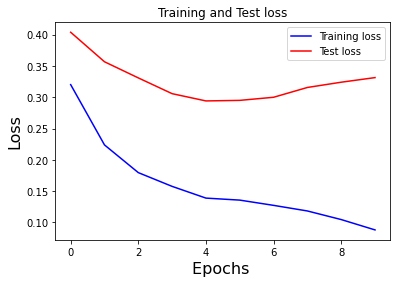

<Figure size 432x288 with 0 Axes>

In [25]:
plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss')
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

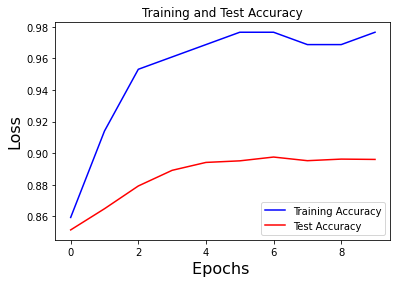

<Figure size 432x288 with 0 Axes>

In [26]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(train_loss)), test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()